<a href="https://colab.research.google.com/github/Prabhsimran1313/Fraud-Transactions-Detection/blob/main/Fraud_detection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Fraud occurs in many different areas, including e-commerce, healthcare, payments and banking. Fraud is a multi-billion dollar industry and growing every year. PwC's 2018 Global Fraud Survey found that half (49%) of the 7,200 companies surveyed had experienced some form of fraud.
Financial fraud refers to the use of legal and fraudulent means to obtain economic benefits. Financial fraud can be committed in many areas such as insurance, banking, tax and banking. In recent years, financial fraud, money laundering and other financial fraud have become a serious problem for companies and businesses. Although some efforts have been made to reduce financial fraud, its persistence has an impact on businesses and people, as large amounts of money are lost to fraud every day. Many scams have emerged over the years. Traditional methods are mostly manual; This is time consuming, expensive, inaccurate and impossible. Further research was conducted to reduce losses from fraud, but to no avail. As artificial intelligence (AI) advances, machine learning and data mining are being used to detect fraud in the financial sector. Use unaudited and audited methods to predict fraudulent activity. The classification system has been the most popular method of detecting financial fraud.

### Dataset link :- https://www.kaggle.com/code/samykhan/fraud-transactions-analysis-balancing-prediction/input

## Import

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data and show first 5 rows
df = pd.read_csv("/content/drive/MyDrive/dataset/PS_20174392719_1491204439457_log.csv")
df_new=pd.read_csv("/content/drive/MyDrive/dataset/PS_20174392719_1491204439457_log.csv",nrows=3000000)
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [ ]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# No Duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis

In [ ]:
## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# set seaborn style because it prettier
sns.set()

In [ ]:
# drop this kind of imbalance feature
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

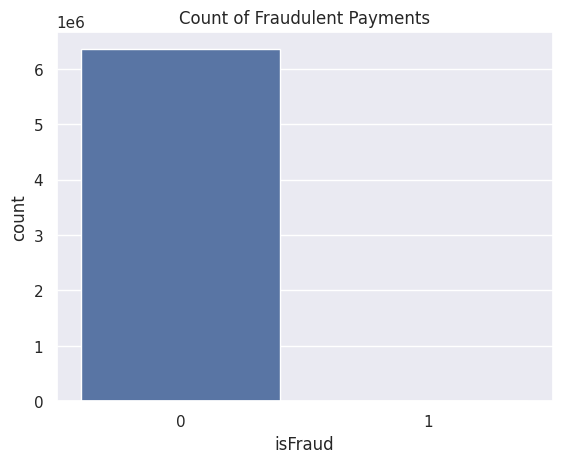

Number of normal examples:  6354407
Number of fradulent examples:  8213


In [ ]:
# Create two dataframes with fraud and non-fraud data
df_fraud = df.loc[df.isFraud == 1]
df_non_fraud = df.loc[df.isFraud == 0]

sns.countplot(x="isFraud",data=df)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.isFraud.count())
print("Number of fradulent examples: ",df_fraud.isFraud.count())
#print(data.fraud.value_counts()) # does the same thing above

<Axes: >

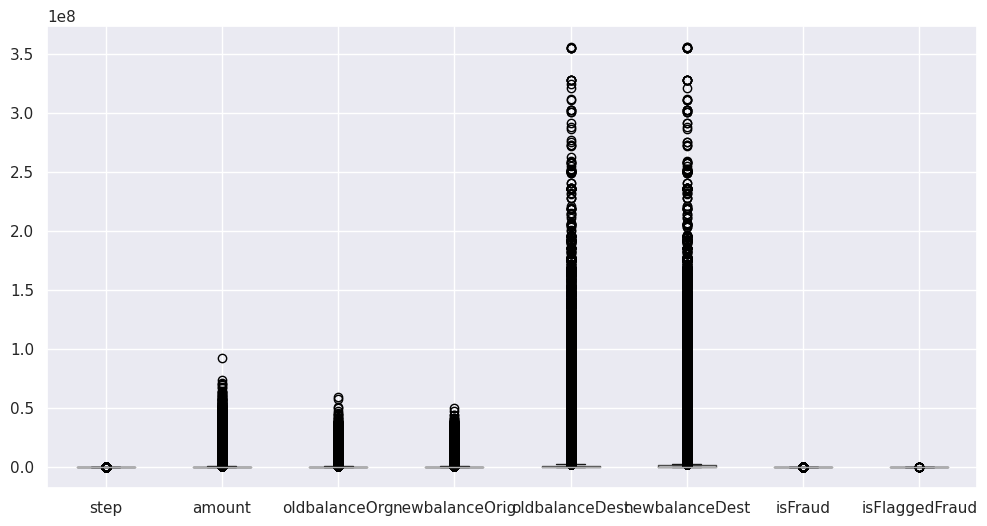

In [ ]:
df.boxplot(figsize=(12,6))

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


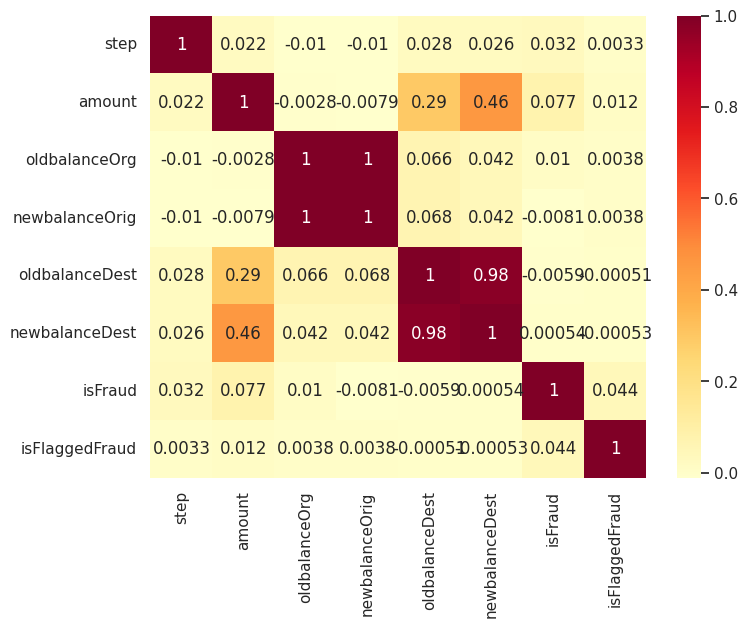

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [ ]:
# Due high Multicollinearity we will drop oldbalance data beacuse instead of that columns we can make use of newbalance data.
df.drop(columns=['oldbalanceDest', 'oldbalanceOrg'], inplace=True)

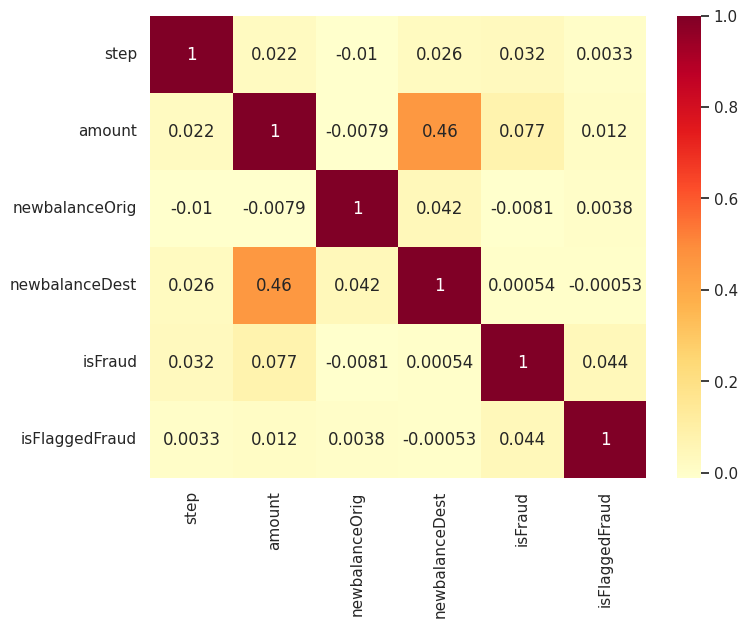

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

Text(0.5, 1.0, 'Distribution of Transaction Types')

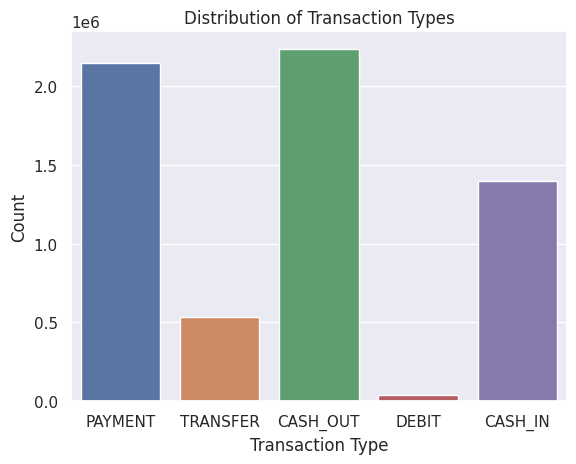

In [ ]:
# Distribution of Transaction Types
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')

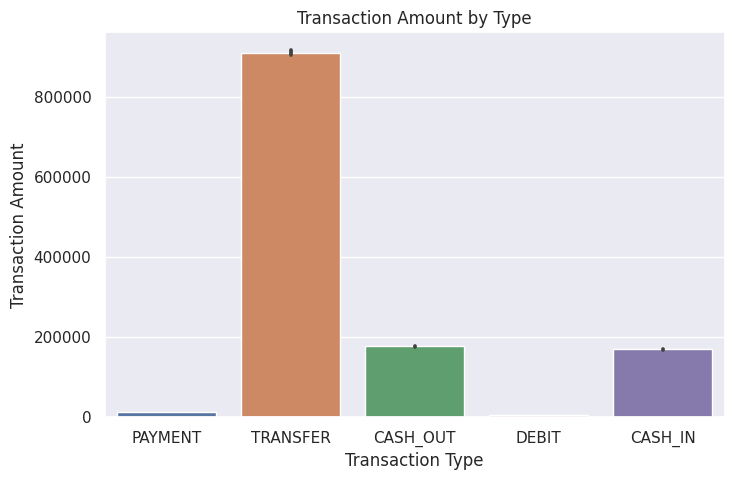

In [ ]:
# the highest transaction amount is transfered by TRANSFER type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

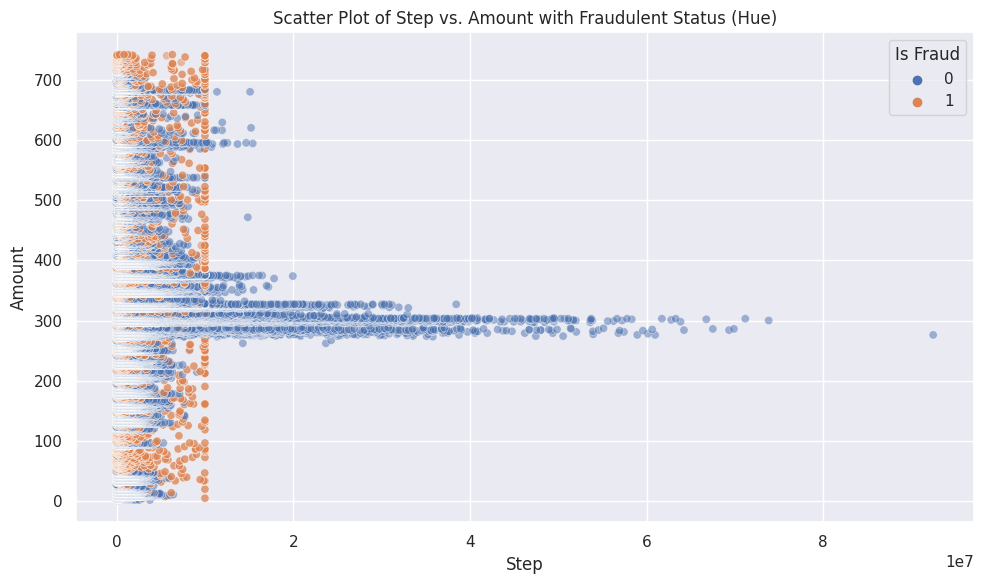

In [ ]:
# There are total 744 steps, In this case 1 step is 1 hour of time
# Fraud transaction happend within 1 or 2 steps, means in less time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

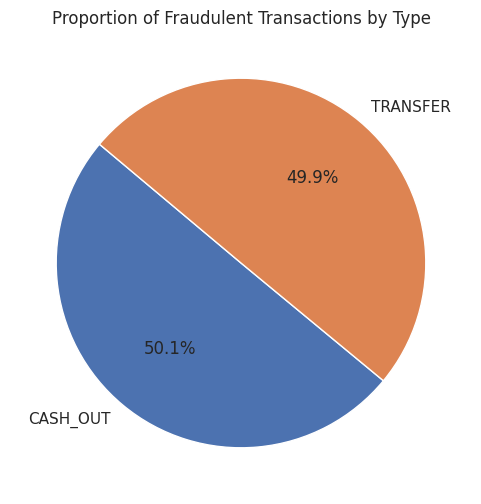

In [ ]:
# Fraud transaction is happend by two types only 'TRANSFER' and 'CASH_OUT'
fraud_proportion = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_proportion, labels=fraud_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent Transactions by Type')
plt.show()

## USING df_new
* here we will use df_new because system was unable to handle whole data
* From df_new we will drop 'isFlaggedFraud' because it was highly imbalanced
* we have to drop highly correlated columns i.e 'oldbalanceOrg' and 'oldbalanceDest'.

In [ ]:
df_new.drop(['oldbalanceOrg','oldbalanceDest','isFlaggedFraud'],axis=1,inplace=True)

<Axes: >

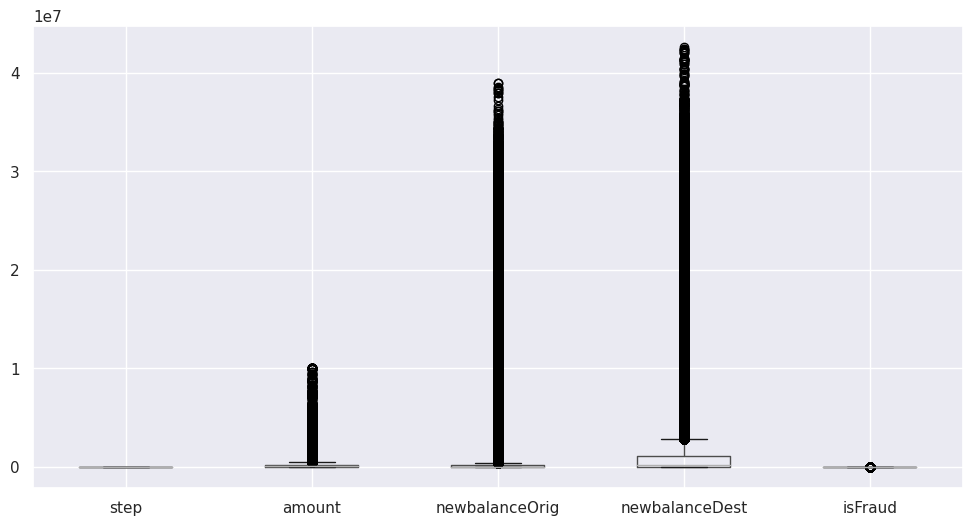

In [ ]:
# Treating ouliers
df_new.boxplot(figsize=(12,6))

In [ ]:
numeric_columns = df_new.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df_new)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: amount, Percentage of outliers: 5.04%
Column: newbalanceOrig, Percentage of outliers: 16.40%
Column: newbalanceDest, Percentage of outliers: 11.06%
Column: isFraud, Percentage of outliers: 0.09%


In [ ]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df_new['newbalanceOrig'])
df_new['newbalanceOrig']=np.where(df_new['newbalanceOrig']>high_leadtime,high_leadtime,df_new['newbalanceOrig'])
df_new['newbalanceOrig']=np.where(df_new['newbalanceOrig']<low_leadtime,low_leadtime,df_new['newbalanceOrig'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df_new['newbalanceDest'])
df_new['newbalanceDest']=np.where(df_new['newbalanceDest']>high_leadtime,high_leadtime,df_new['newbalanceDest'])
df_new['newbalanceDest']=np.where(df_new['newbalanceDest']<low_leadtime,low_leadtime,df_new['newbalanceDest'])

## Encoding

In [ ]:
# encoding 'type' column
df_new = pd.get_dummies(df_new, columns=['type'], prefix=['type'])
df_new.shape

(3000000, 12)

In [ ]:
df_new.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,19384.72,M2044282225,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,0.00,C553264065,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,0.00,C38997010,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,29885.86,M1230701703,0.00,0,0,0,0,1,0


In [ ]:
# encoding 'nameOrig' and 'nameDest'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['nameOrig']=le.fit_transform(df_new['nameOrig'])
df_new['nameDest']=le.fit_transform(df_new['nameDest'])

In [ ]:
df_new.head(5)

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,358086,160296.36,780575,0.00,0,0,0,0,1,0
1,1,1864.28,1033293,19384.72,814368,0.00,0,0,0,0,1,0
2,1,181.00,473430,0.00,208115,0.00,1,0,0,0,0,1
3,1,181.00,2749909,0.00,185468,0.00,1,0,1,0,0,0
4,1,11668.14,1625449,29885.86,390711,0.00,0,0,0,0,1,0


In [ ]:
# Highly imbalanced
df_new['isFraud'].value_counts()

0    2997381
1       2619
Name: isFraud, dtype: int64

## Splitting

In [ ]:
x=df_new.drop(['isFraud'],axis=1)
y=df_new['isFraud']

## Smoting

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

In [ ]:
y.value_counts()

0    2997381
1    2997381
Name: isFraud, dtype: int64

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=142)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4496071, 11)
(1498691, 11)
(4496071,)
(1498691,)


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [ ]:
# %% Function for plotting ROC_AUC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Model Training

## Random Forest Classifier

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  7.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.8s


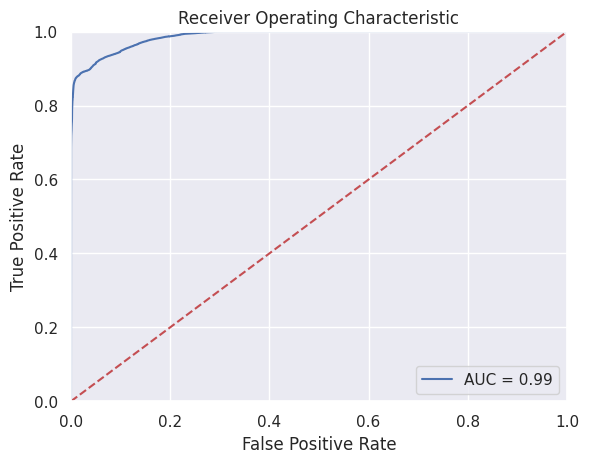

In [ ]:
# %% Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(x_train_sc, y_train)
y_pred = rf_clf.predict(x_test_sc)

plot_roc_auc(y_test, rf_clf.predict_proba(x_test_sc)[:,1])

Confusion Matrix of Random Forest Classifier: 
 [[734825  14795]
 [ 84243 664828]]


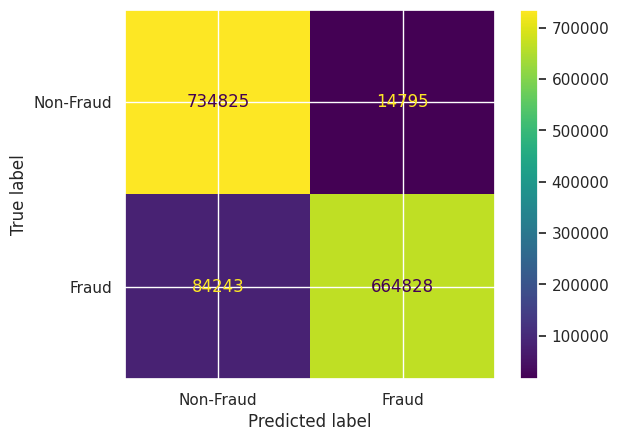

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
print("Confusion Matrix of Random Forest Classifier: \n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud','Fraud'])
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94    749620
           1       0.98      0.89      0.93    749071

    accuracy                           0.93   1498691
   macro avg       0.94      0.93      0.93   1498691
weighted avg       0.94      0.93      0.93   1498691



## XGBoost Classifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:38:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


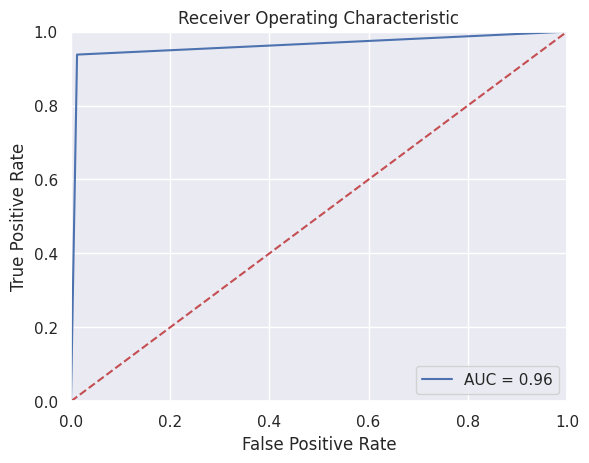

In [ ]:
# XGBOOST Classification
import xgboost as xgb

XGBoost_CLF = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=400,
    objective="binary:hinge",
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    verbosity=1  # Change verbosity to the desired level
)

XGBoost_CLF.fit(x_train_sc, y_train)
y_pred = XGBoost_CLF.predict(x_test_sc)
plot_roc_auc(y_test, XGBoost_CLF.predict_proba(x_test_sc)[:,1])

Confusion Matrix of Random Forest Classifier: 
 [[740466   9154]
 [ 46513 702558]]


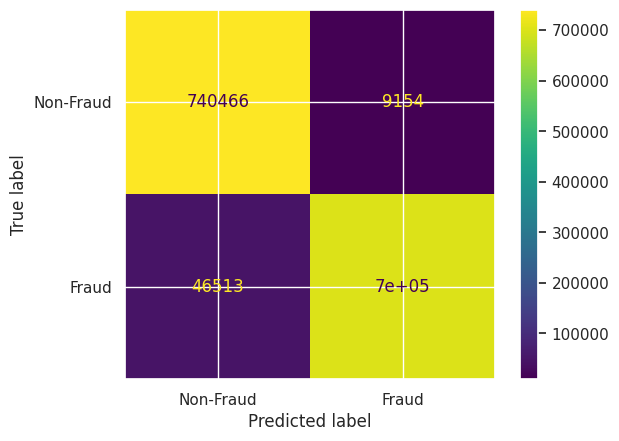

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=XGBoost_CLF.classes_)
print("Confusion Matrix of Random Forest Classifier: \n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud','Fraud'])
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    749620
           1       0.99      0.94      0.96    749071

    accuracy                           0.96   1498691
   macro avg       0.96      0.96      0.96   1498691
weighted avg       0.96      0.96      0.96   1498691

